In [5]:
import kagglehub
import shutil
from pathlib import Path

# Get current working directory
current_dir = Path.cwd()

# Download dataset (goes to kagglehub's cache folder)
path = kagglehub.dataset_download("deepu1109/star-dataset")

print("Downloaded (cached) at:", path)

# Copy dataset folder from cache to your current directory
target_path = current_dir / "star-dataset"
if not target_path.exists():
    shutil.copytree(path, target_path)

print("Dataset copied to:", target_path)


Downloaded (cached) at: C:\Users\caaka\.cache\kagglehub\datasets\deepu1109\star-dataset\versions\1
Dataset copied to: d:\Github\Physics\Star_Classification\star-dataset


In [6]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
raw_data = pd.read_csv("star-dataset/6 Class csv.csv")
raw_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [13]:
# Copying the dataset
from copy import deepcopy
df=deepcopy(raw_data)
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [22]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [21]:
# Printing Unique values from some columns in the dataset
print("Star Types :", df['Star type'].unique())
print("Star Colors :", df['Star color'].unique())
print("Spectral Classes :", df['Spectral Class'].unique())

Star Types : [0 1 2 3 4 5]
Star Colors : ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Spectral Classes : ['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [24]:
# Cleaning the data (replaceing "-" in Star Colors with " ")
df['Star color'] = df['Star color'].str.strip().str.replace("-", " ").str.title()
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White',
       'Pale Yellow Orange', 'Blue', 'Whitish', 'Yellow White', 'Orange',
       'White Yellow', 'Yellowish', 'Orange Red'], dtype=object)

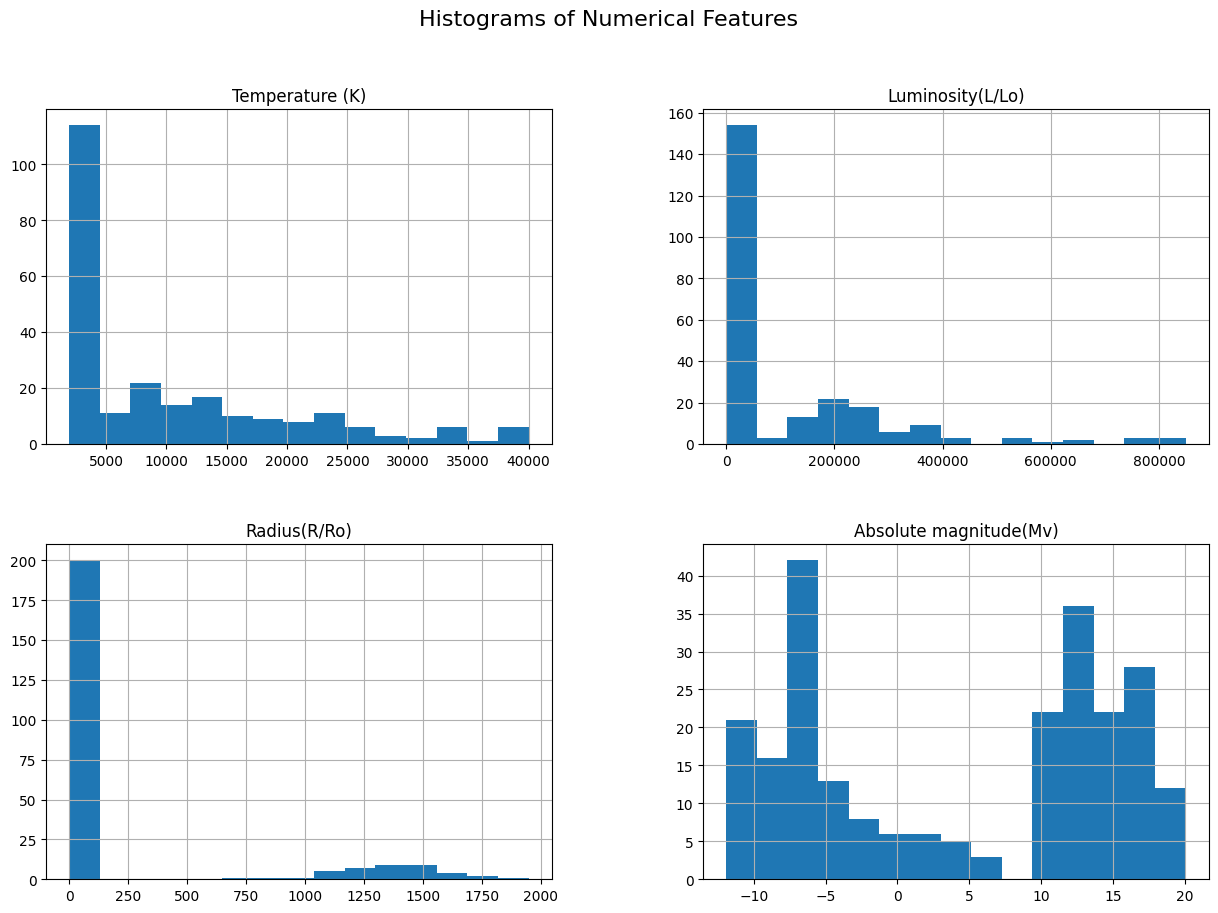

In [25]:
# Histograms for numerical features
numerical_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

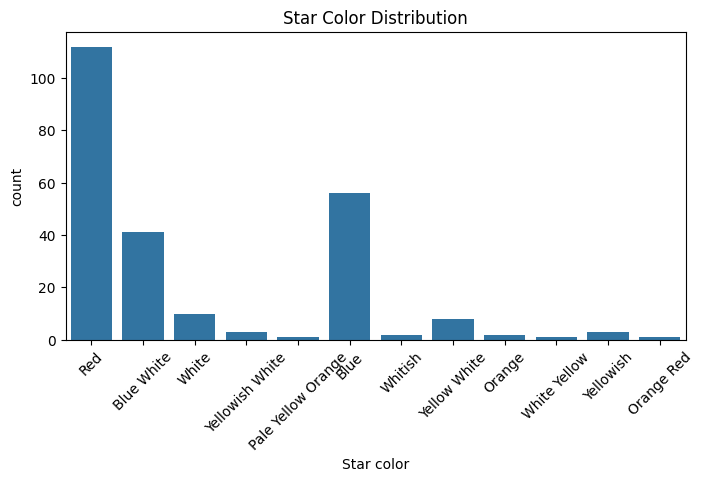

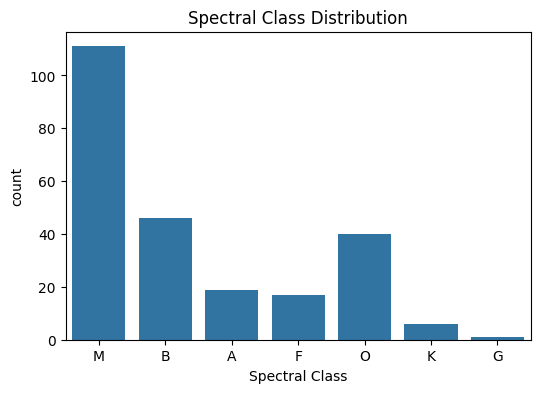

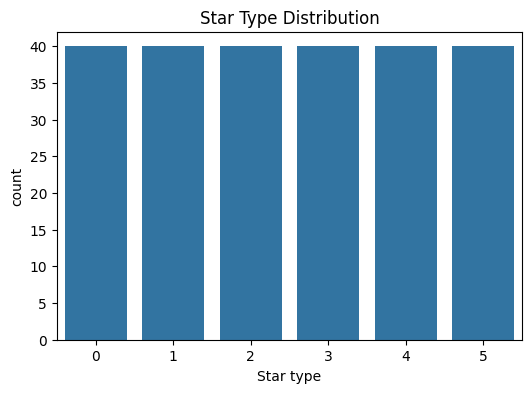

In [27]:
# Count plots for categorical features

# Star Color
plt.figure(figsize=(8, 4))
sns.countplot(x='Star color', data=df)
plt.title('Star Color Distribution')
plt.xticks(rotation=45)
plt.show()

# Spectral Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Spectral Class', data=df)
plt.title('Spectral Class Distribution')
plt.show()

# Star type
plt.figure(figsize=(6, 4))
sns.countplot(x='Star type', data=df)
plt.title('Star Type Distribution')
plt.show()

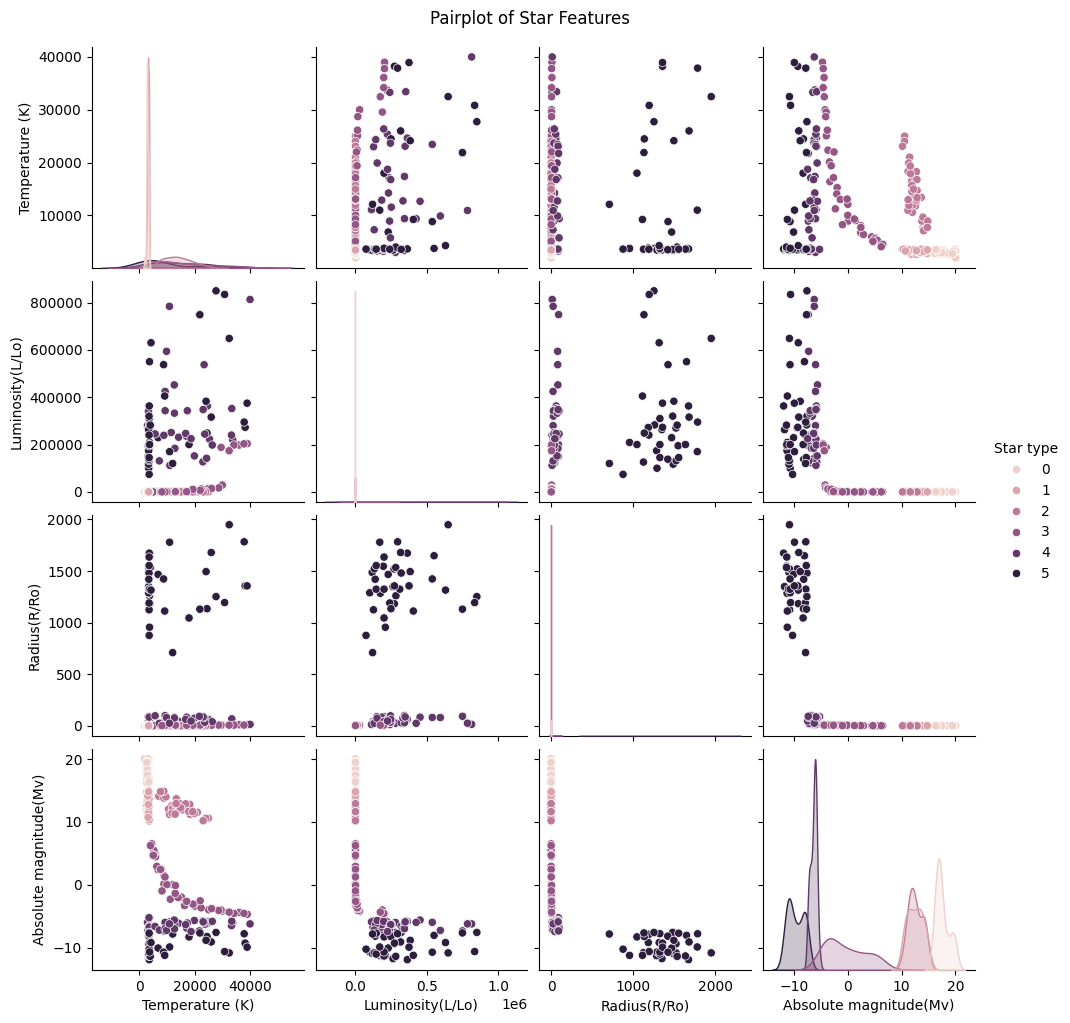

In [33]:
# Plotting pairplot to see the distribution of data
sns.pairplot(df, hue='Star type', diag_kind='kde')
plt.suptitle('Pairplot of Star Features', y=1.02)
plt.show()

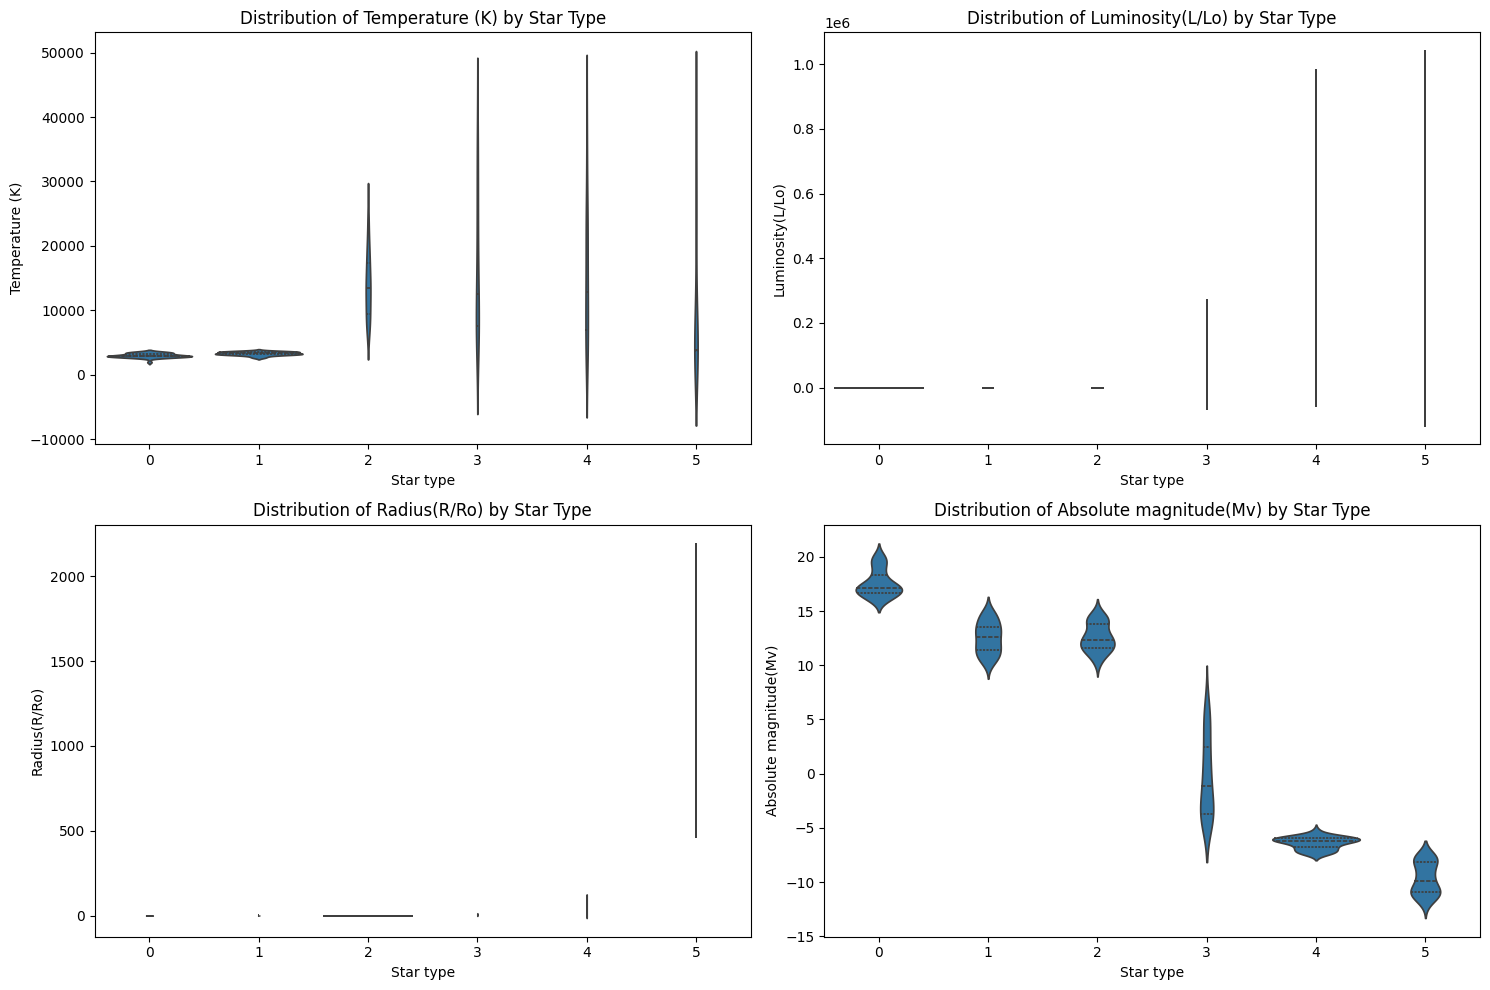

In [29]:
# Violin plots to see the distribution of numerical features across star types
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Star type', y=feature, data=df, inner='quartile')
    plt.title(f'Distribution of {feature} by Star Type')
plt.tight_layout()
plt.show()

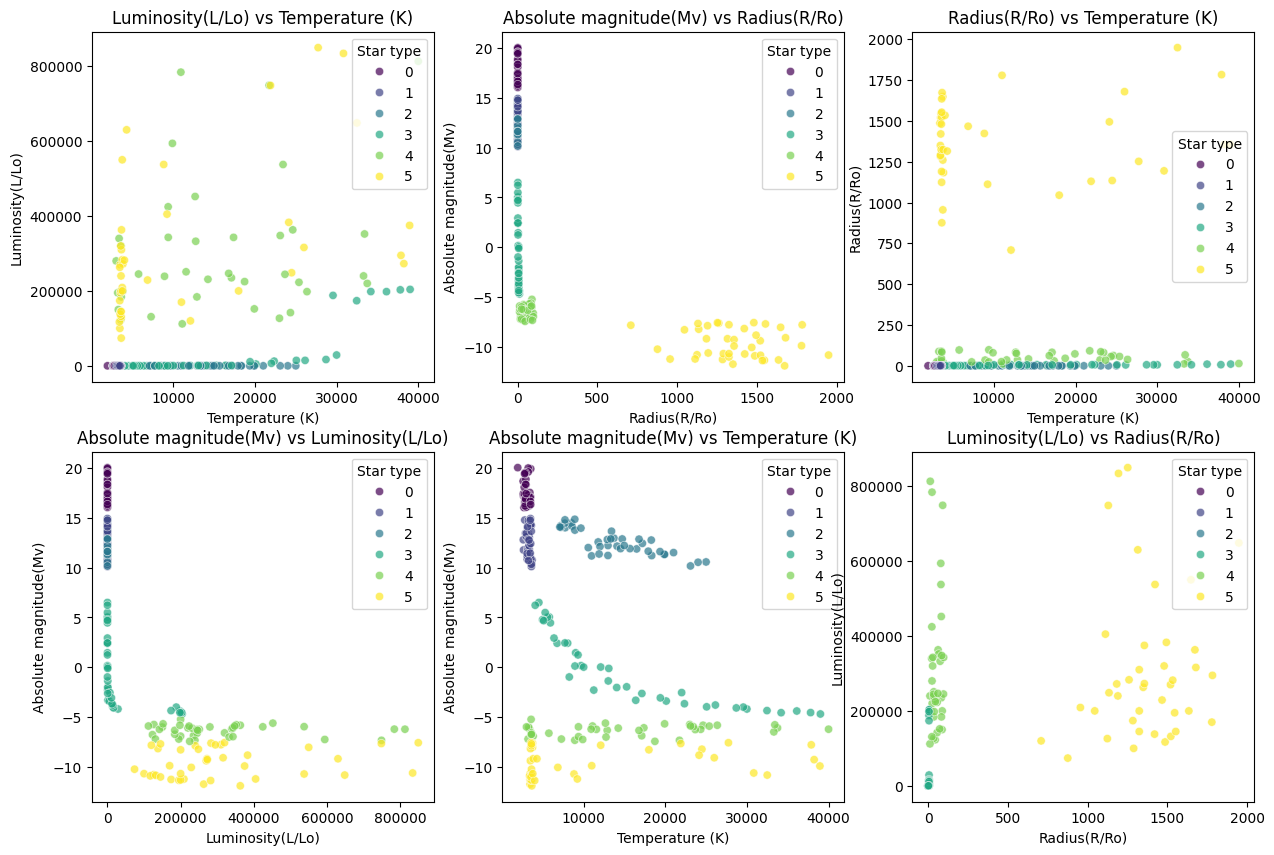

In [42]:
# Scatter plots to see relationships between numerical features
plt.figure(figsize=(15, 10))
for i, (x_feature, y_feature) in enumerate([('Temperature (K)', 'Luminosity(L/Lo)'),
                                           ('Radius(R/Ro)', 'Absolute magnitude(Mv)'),
                                           ('Temperature (K)', 'Radius(R/Ro)'),
                                           ('Luminosity(L/Lo)', 'Absolute magnitude(Mv)'),
                                           ('Temperature (K)', 'Absolute magnitude(Mv)'),
                                           ('Radius(R/Ro)', 'Luminosity(L/Lo)')], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Star type', data=df, palette='viridis', alpha=0.7)
    plt.title(f'{y_feature} vs {x_feature}')

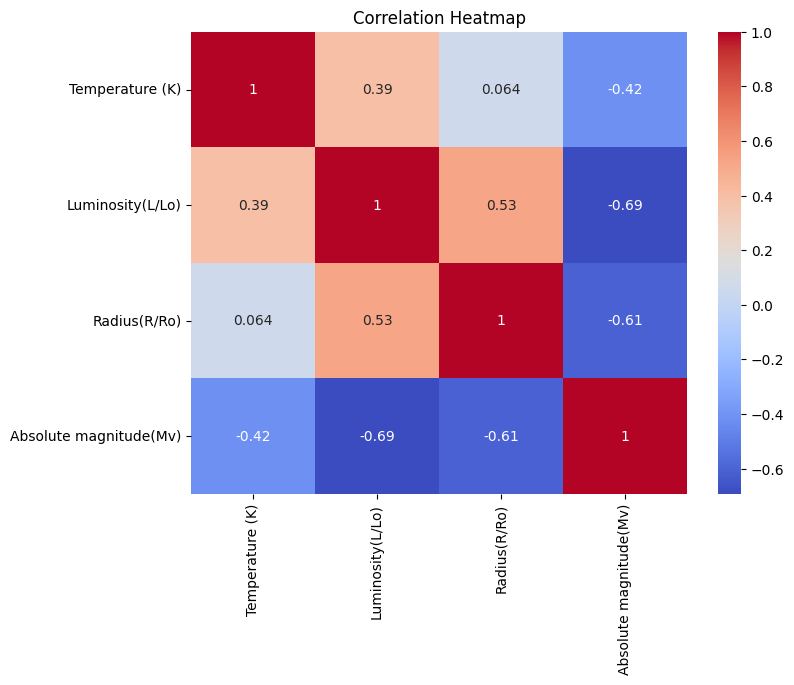

In [44]:
# Correlation heatmap
corr = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

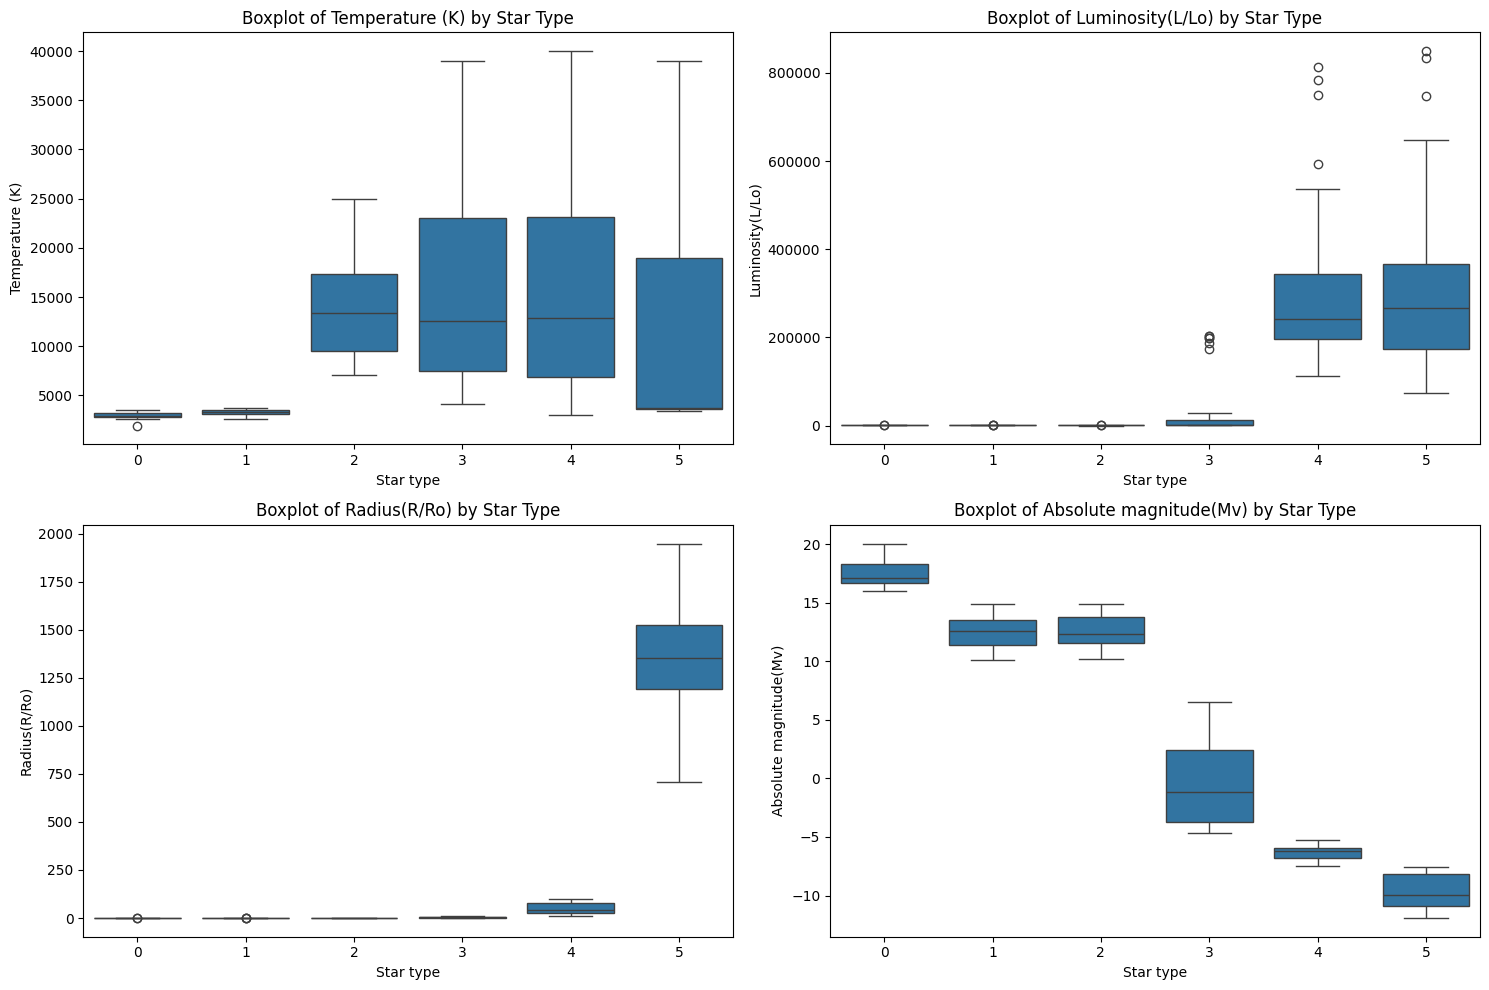

In [46]:
# Boxplots to see the spread of numerical features across star types
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Star type', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Star Type')
plt.tight_layout()